# This notebook creates train/test data sets
- Import the cleaned housing data
- Review histograms of the data
- Prepare for one hot encoding
- Create dictionary of values prior to min/max scaling
- Implement min/max scaling and one hot encoding
- Export train and test data

### Import the required packages

In [29]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer, MinMaxScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")
import pickle

### Import the data and create X df for independant variables and y df for dependant variables

In [30]:
data = pd.read_csv('data_cleaned.csv', index_col=0)
data = data.drop(columns=['id', 'long', 'lat', 'date'])
X_cols = data.drop(columns=['price'])
y = data.price.values

### Review histogram from the dependant variables

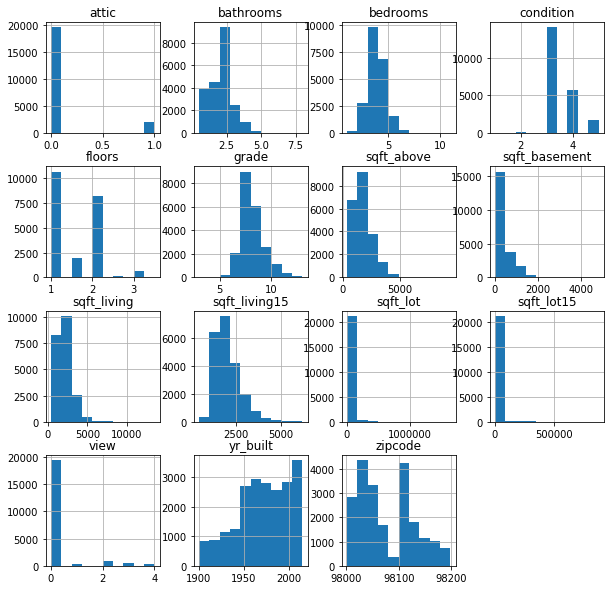

In [32]:
pd.DataFrame.hist(X_cols, figsize = [10, 10]);
# residuals of overall model

### Prepare data for the one hot encoding and column transformation
Need to create data frame and lists of categorical variables and continuous variables

In [33]:
categories = X_cols[['bathrooms', 'bedrooms', 'floors', 'condition', 'grade', 'attic', \
                     'zipcode', 'view', 'yr_built']]
categories_ls = list(categories.columns)
x_cols_ls = list(X_cols.columns)
numeric_vars = [x for x in x_cols_ls if x not in categories]

### Create a minimum/maximum value dictionary
This dictionary records the minimum/maximum values for the continuous, independant variables to return to normal values after normalization.  Convert the dicitonary to a dataframe and save as a csv.

In [34]:
# min_max_dict = {}

# for c in X_cols:
#     if c in categories.columns:
#         pass
#     else:
#         min_max_dict.update({c: [X_cols[c].min(), X_cols[c].max()]})

# min_max_df = pd.DataFrame.from_dict(min_max_dict)
# min_max_df.to_csv('min_max_vals')

In [35]:
### Create ohe headers (based on categorical values) and continuous variable headers

### Min/max scaling for independant, continuous variables and convert categorical variables to strings

In [36]:
# Create dictionary of category variable names, counts, and a sorted list of values
category_counts = {}

for cat in categories:
    l = len(list(X_cols[cat].unique())) - 1
    vals = sorted(list(X_cols[cat].unique().round(3)))
    category_counts.update({cat: [l, vals[1:]]})

ohe_cols = []
for cc in category_counts:
    for r in range(0, category_counts[cc][0]):
        column = '{}_{}'.format(cc, category_counts[cc][1][r])
        ohe_cols.append(column)

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()

for c in X_cols.columns:
    if c in categories:
        X_cols[c] = X_cols[c].astype(str)
    else:
        x = np.array(X_cols[c]).reshape(-1, 1)
        X_cols[c] = min_max_scaler.fit_transform(x)

### One hot encoding for housing data

In [38]:
## create an encoder object. This will help us to convert
## categorical variables to new columns
encoder = OneHotEncoder(handle_unknown= 'error',
                        drop='first',
                        categories= 'auto',
                        sparse=True)

## Create an columntransformer object.
## This will help us to merge transformed columns
## with the rest of the dataset.

ct = ColumnTransformer(transformers =[('ohe', encoder, categories_ls)], remainder= 'passthrough')
ct.fit(X_cols[x_cols_ls])
X = ct.transform(X_cols)
X = X.todense()

In [39]:
# Create columns for X df
columns = ohe_cols + numeric_vars

In [40]:
X = pd.DataFrame(X, columns=columns)

### Split data into train and test groups

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

pickle_out = open('y_train.pickle', 'wb')
pickle.dump(y_train, pickle_out)

pickle_out = open('y_test.pickle', 'wb')
pickle.dump(y_test, pickle_out)